In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import linregress
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
ev = pd.read_csv("IEA-EV-dataEV-salesCarsHistorical.csv")
fuel = pd.read_csv("Fuel_production_vs_consumption.csv", encoding='utf-8')
gas = pd.read_csv("gas_prices.csv", encoding='utf-8')

Correlation coefficient for World: 0.3079223518088552


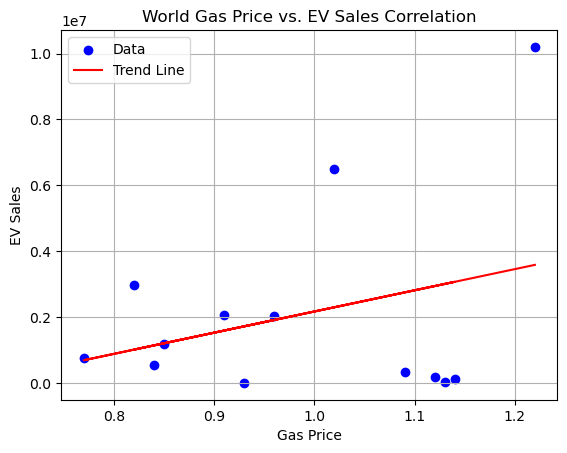

Correlation coefficient for US: 0.4370300943408833


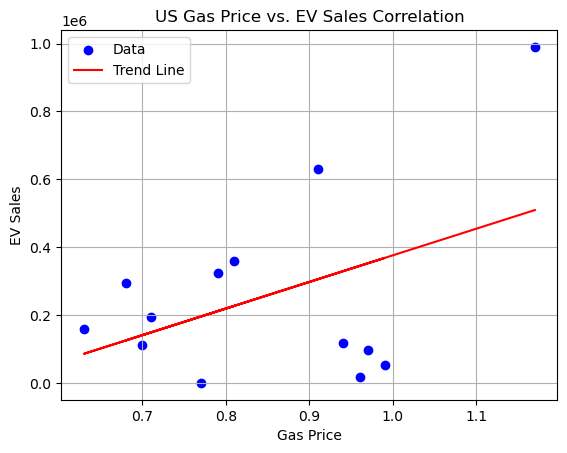

Correlation coefficient for China: 0.29451292861270884


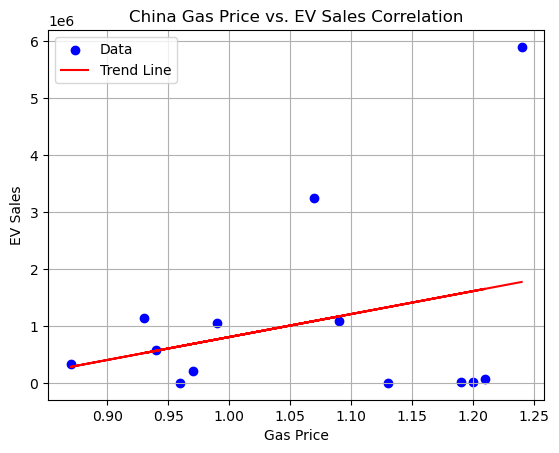

Correlation coefficient for Japan: -0.3604993500557339


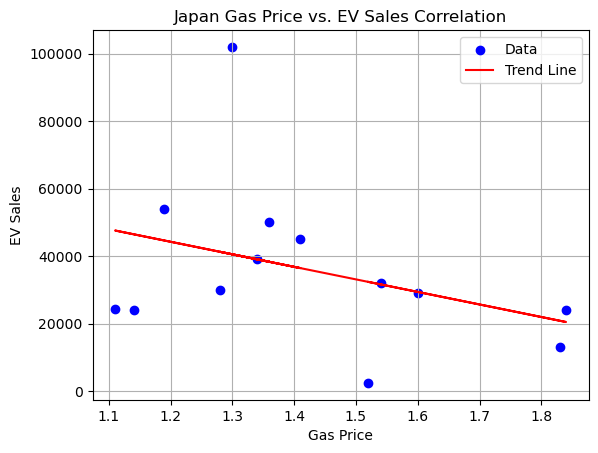

Correlation coefficient for India: 0.3967557129468076


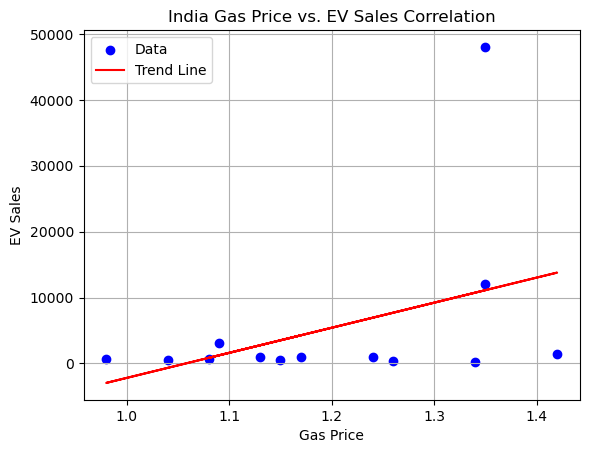

Correlation coefficient for Canada: 0.10436570840012961


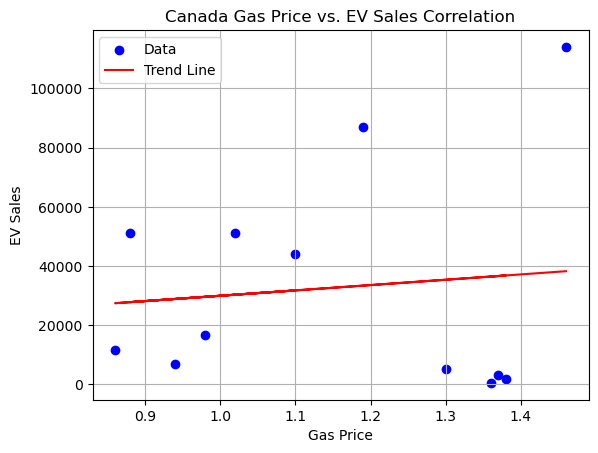

Correlation coefficient for Russia: 0.5779197412085426


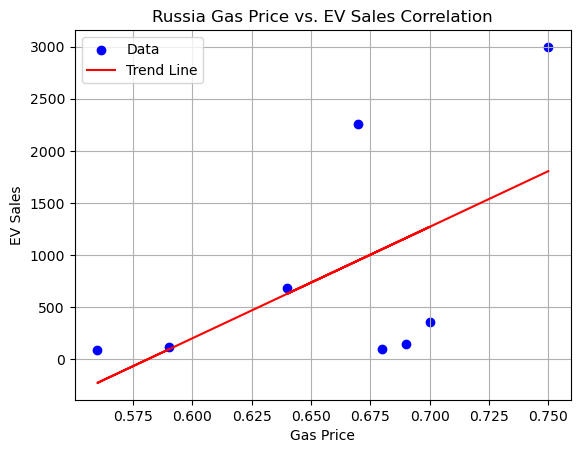

In [11]:
top_countries = ["World", "USA", "China", "Japan", "India", "Canada", "Russia"]

for country in top_countries:
    # Select country and keep only year and value
    data = ev[ev['region'] == country]
    columns_to_keep = ['year', 'value'] 
    data = data.drop(columns=set(ev.columns) - set(columns_to_keep))

    # Sum by year to get the total ev's sold for that year
    data = data.groupby('year')['value'].sum()
    data = data.reset_index()
    data.rename(columns={'value': 'value'}, inplace=True)
    ev_value = data['value']

    # col_keep = []
    gas_price = gas
    gas_price.rename(columns={gas_price.columns[0]: 'year'}, inplace=True)

    if country == "USA":
        country = "US"

    gas_price_2010 = gas_price[gas_price["year"] >= 2010]
    if country == "Canada":
        gas_price_2010 = gas_price[gas_price["year"] >= 2011]
    if country == "Russia":
        gas_price_2010 = gas_price[gas_price["year"] >= 2015]

    price = gas_price_2010[country]
    year = gas_price_2010['year']


    correlation = np.corrcoef(price, ev_value)[0,1]
    print(f"Correlation coefficient for {country}:", correlation)


    slope, intercept, r_value, p_value, std_err = linregress(price, ev_value)
    trend_line = slope * price + intercept

    plt.scatter(price, ev_value, label='Data', color='blue')
    plt.plot(price, trend_line, label='Trend Line', color='red')
    plt.xlabel('Gas Price')
    plt.ylabel('EV Sales')
    plt.title(f'{country} Gas Price vs. EV Sales Correlation')
    plt.legend()
    plt.grid(True)
    # plt.savefig(f'plots/correlations/{country}_CostvsSales_corr.png')
    plt.show()



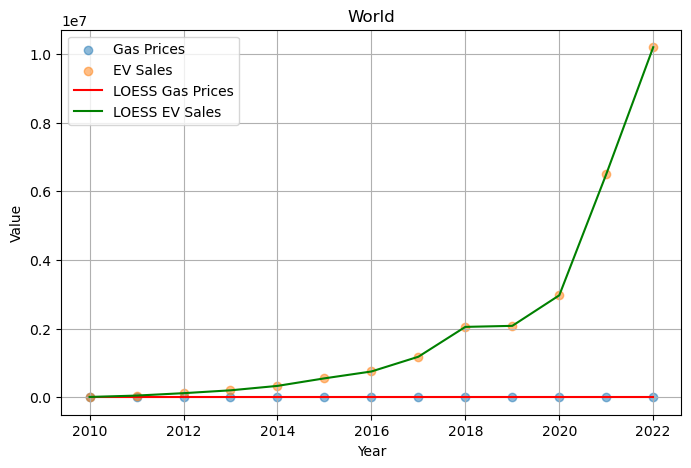

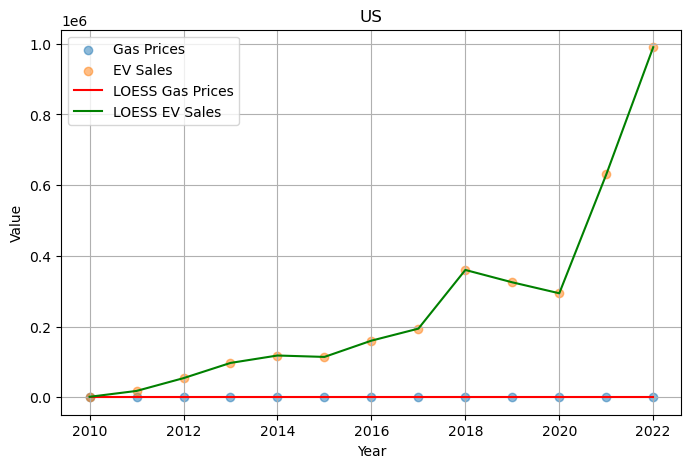

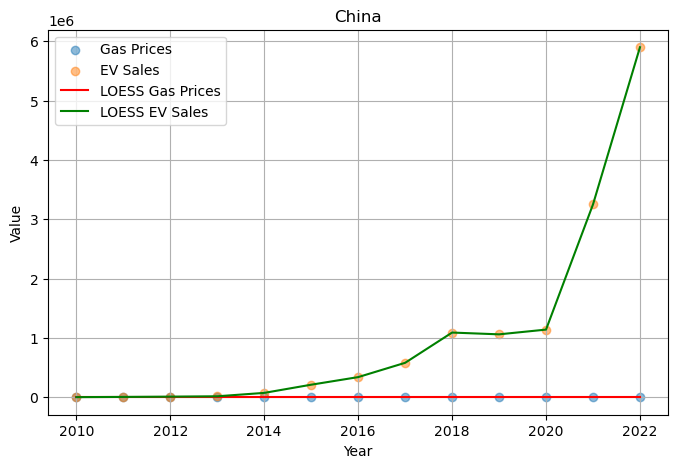

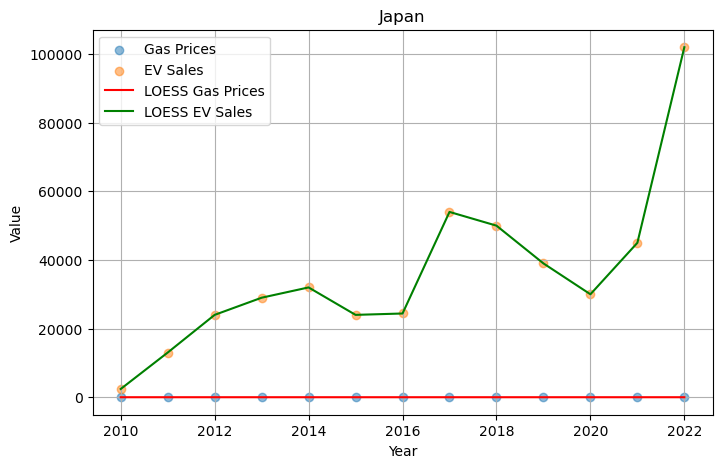

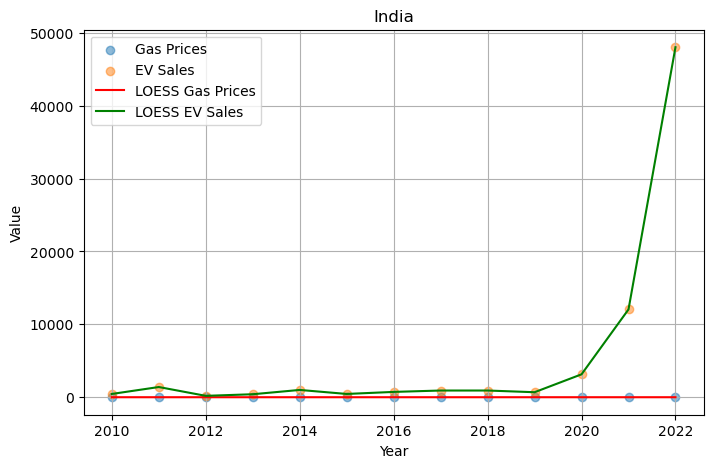

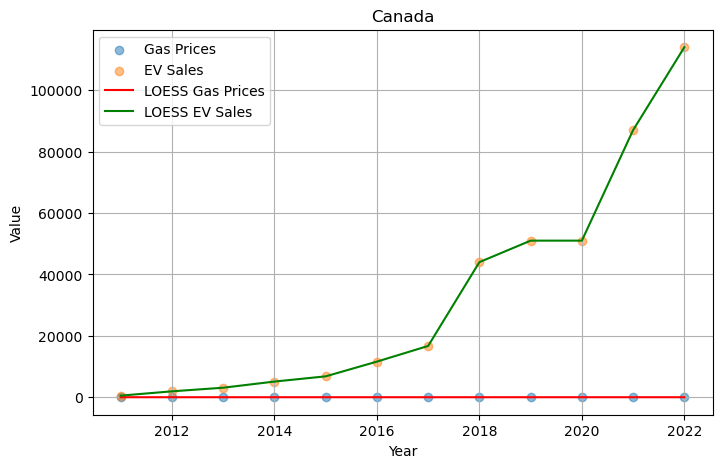

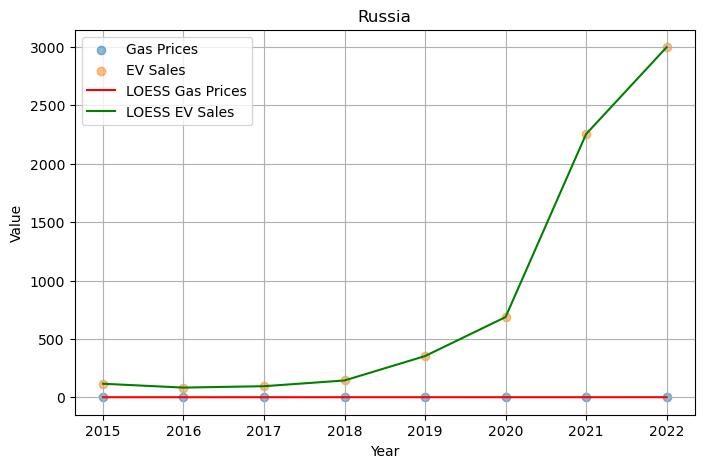

In [12]:
top_countries = ["World", "USA", "China", "Japan", "India", "Canada", "Russia"]
for country in top_countries:
    # Select country and keep only year and value
    data = ev[ev['region'] == country]
    columns_to_keep = ['year', 'value'] 
    data = data.drop(columns=set(ev.columns) - set(columns_to_keep))

    # Sum by year to get the total ev's sold for that year
    data = data.groupby('year')['value'].sum()
    data = data.reset_index()
    data.rename(columns={'value': 'value'}, inplace=True)
    ev_value = data['value']

    gas_price = gas
    gas_price.rename(columns={gas_price.columns[0]: 'year'}, inplace=True)

    if country == "USA":
        country = "US"

    gas_price_2010 = gas_price[gas_price["year"] >= 2010]
    if country == "Canada":
        gas_price_2010 = gas_price[gas_price["year"] >= 2011]
    if country == "Russia":
        gas_price_2010 = gas_price[gas_price["year"] >= 2015]

    price = gas_price_2010[country]
    year = gas_price_2010['year']
    
    # LOESS smoothing for gas prices and EV sales separately
    loess_smoothed_gas = lowess(price, year, frac=0.3)
    loess_smoothed_ev = lowess(ev_value, year, frac=0.3)

    plt.figure(figsize=(8, 5))
    plt.scatter(year, price, label='Gas Prices', alpha=0.5)
    plt.scatter(year, ev_value, label='EV Sales', alpha=0.5)
    plt.plot(loess_smoothed_gas[:, 0], loess_smoothed_gas[:, 1], 'r-', label='LOESS Gas Prices')
    plt.plot(loess_smoothed_ev[:, 0], loess_smoothed_ev[:, 1], 'g-', label='LOESS EV Sales')
    plt.xlabel('Year')
    plt.ylabel("Value")
    plt.title(f'{country}')
    plt.legend()
    plt.grid(True)
    # plt.savefig(f'plots/correlations/{country}_Loess.png')
    plt.show()



Correlation coefficient for World: 0.9258476557502966


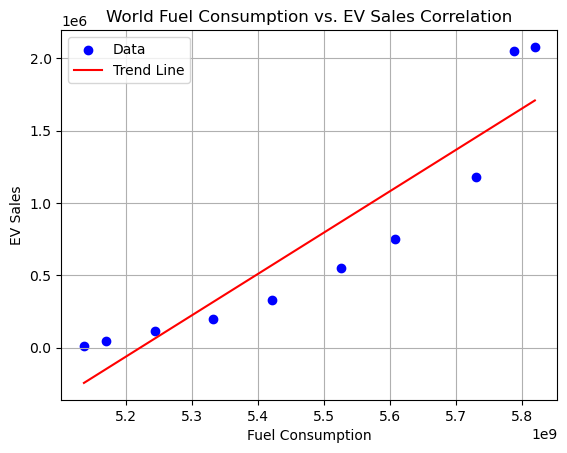

Correlation coefficient for United States: 0.5370671829803608


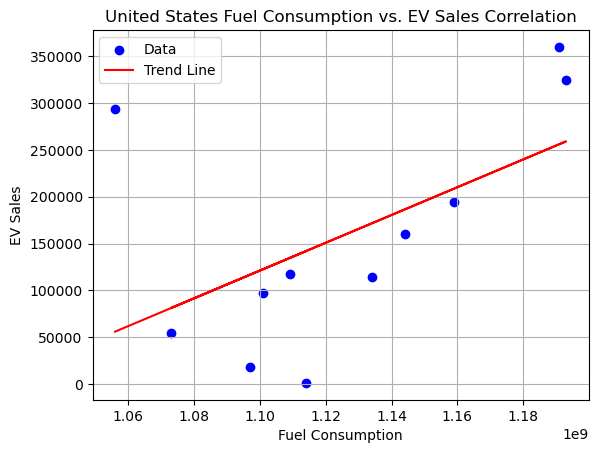

Correlation coefficient for China: 0.8904259722567825


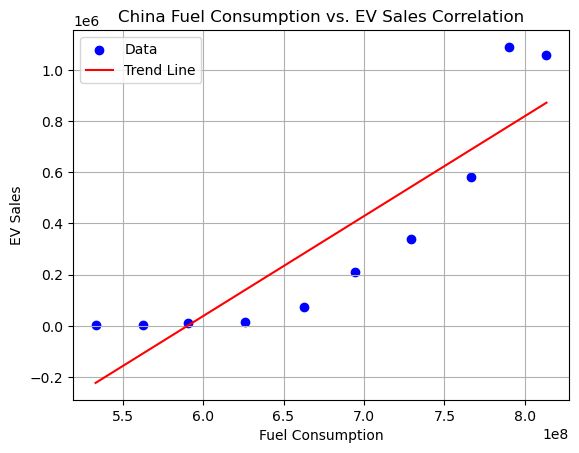

Correlation coefficient for Japan: -0.4938460536460953


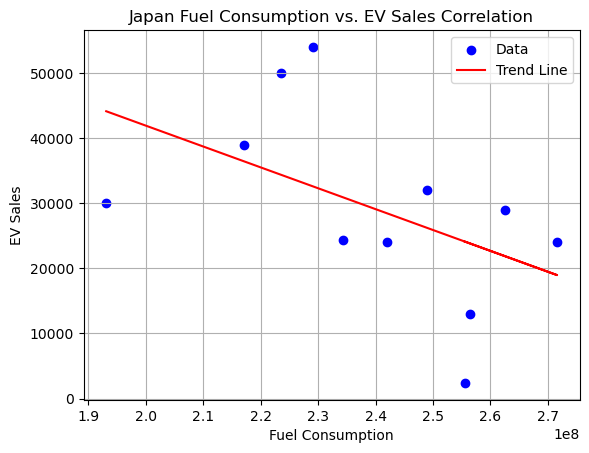

Correlation coefficient for India: 0.1605037617891238


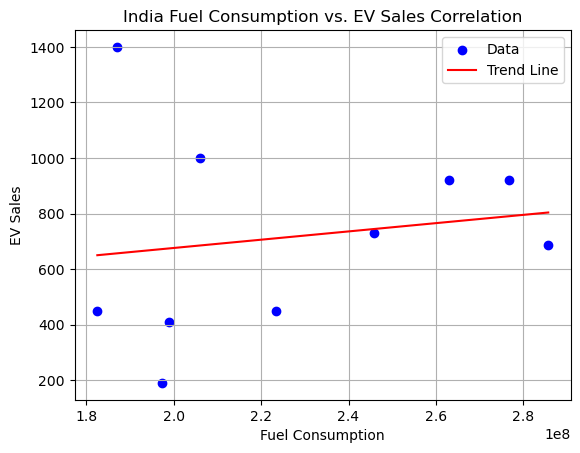

Correlation coefficient for Canada: -0.1161145972799687


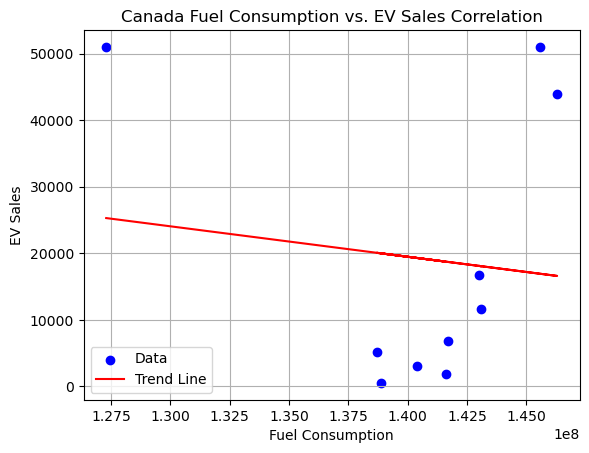

Correlation coefficient for Russia: -0.3340142797803357


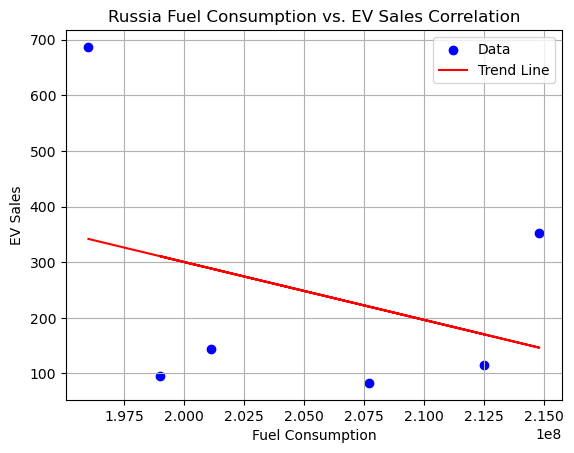

In [13]:
top_countries = ["World", "USA", "China", "Japan", "India", "Canada", "Russia"]

for country in top_countries:
    # Select country and keep only year and value
    data = ev[ev['region'] == country]
    columns_to_keep = ['year', 'value'] 
    data = data.drop(columns=set(ev.columns) - set(columns_to_keep))

    # Sum by year to get the total ev's sold for that year
    data = data.groupby('year')['value'].sum()
    data = data.reset_index()
    data.rename(columns={'value': 'value'}, inplace=True)
    data = data[data['year'] < 2021]
    if country == "World" or country == "China" or country == "India":
        data = data[data['year'] < 2020]

    ev_value = data['value']

    fuel_consumption = fuel

    if country == "USA":
        country = "United States"

    fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2010) & (fuel_consumption["Year"] < 2021)]
    if country == "Canada":
        fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2011) & (fuel_consumption["Year"] < 2021)]
    elif country == "Russia":
        fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2015) & (fuel_consumption["Year"] < 2021)]
    elif country == "India" or country == "China" or country == "World":
        fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2010) & (fuel_consumption["Year"] < 2020)]


    fuel_consumption_country = fuel_consumption_2010[fuel_consumption_2010['Entity'] == country]['Oil consumption(m)']


    fuel_consumption_country = fuel_consumption_country.astype(float)
    ev_value = ev_value.astype(float)

    # Calculate the correlation coefficient using Pandas
    correlation = np.corrcoef(fuel_consumption_country, ev_value)[0,1]

    print(f"Correlation coefficient for {country}:", correlation)


    # Perform linear regression to get the trend line
    slope, intercept, r_value, p_value, std_err = linregress(fuel_consumption_country, ev_value)
    trend_line = slope * fuel_consumption_country + intercept

    plt.scatter(fuel_consumption_country, ev_value, label='Data', color='blue')
    plt.plot(fuel_consumption_country, trend_line, label='Trend Line', color='red')
    plt.xlabel('Fuel Consumption')
    plt.ylabel('EV Sales')
    plt.title(f'{country} Fuel Consumption vs. EV Sales Correlation')
    plt.legend()
    plt.grid(True)
    # plt.savefig(f'plots/correlations/{country}_ConsumptionvsSales_corr.png')
    plt.show()



World R-squared: 0.945


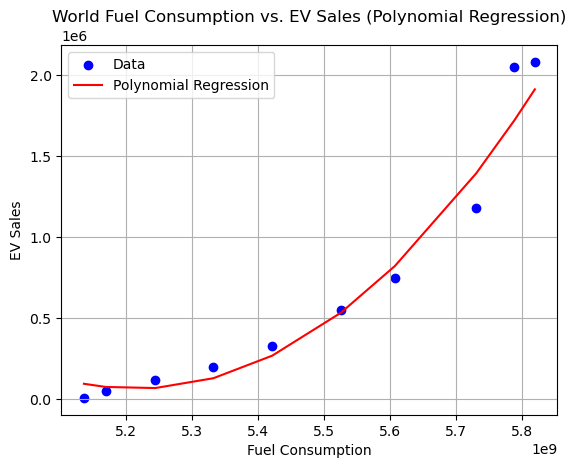

United States R-squared: 0.793


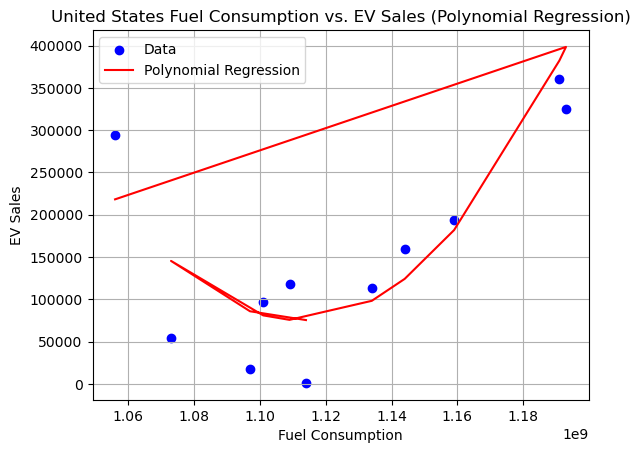

China R-squared: 0.868


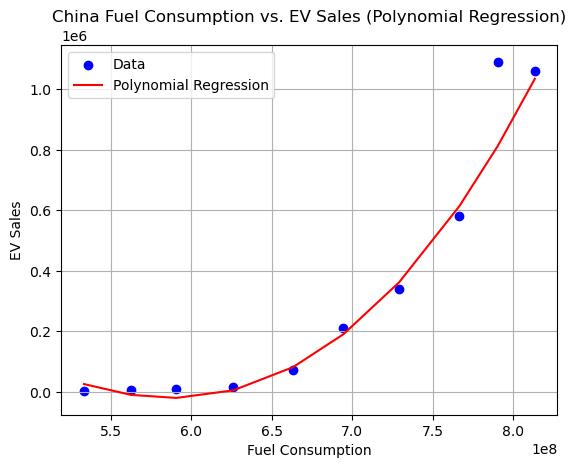

Japan R-squared: -0.316


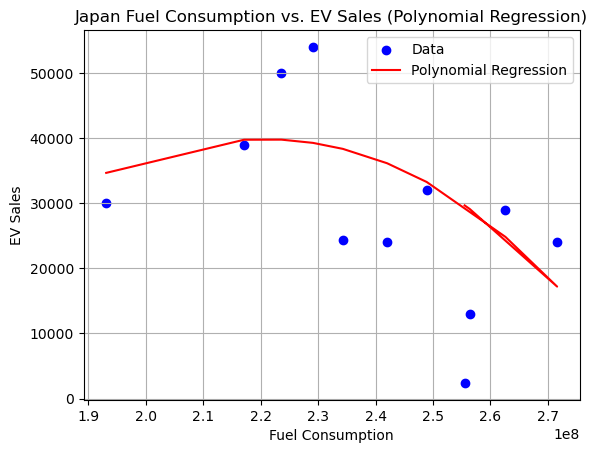

India R-squared: -7.876


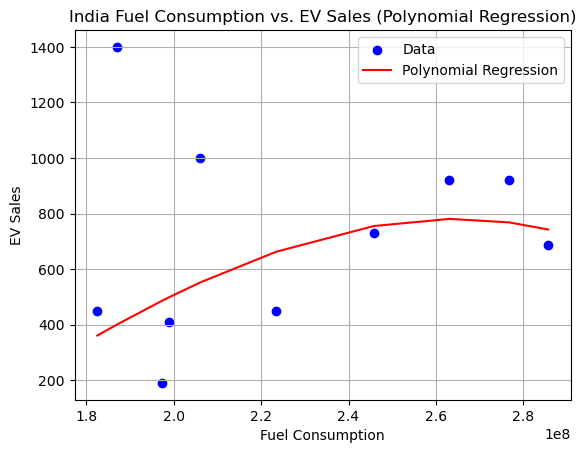

Canada R-squared: 0.751


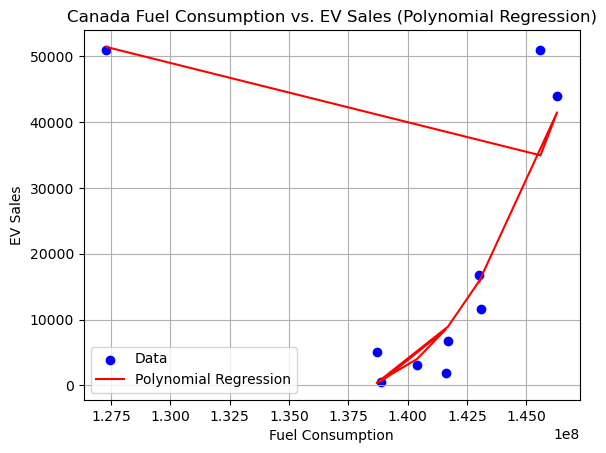

Russia R-squared: -112.046


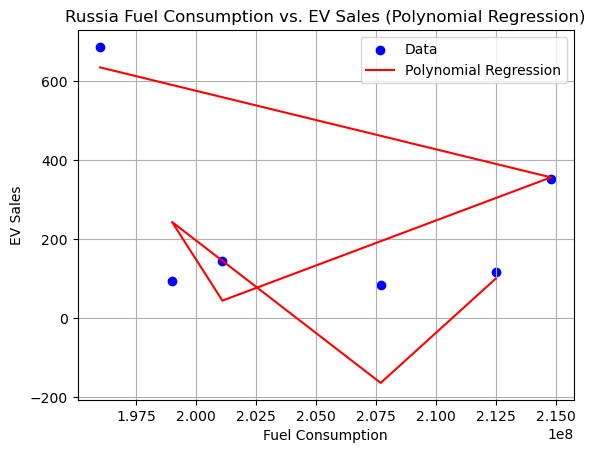

In [14]:
top_countries = ["World", "USA", "China", "Japan", "India", "Canada", "Russia"]

for country in top_countries:
    # Select country and keep only year and value
    data = ev[ev['region'] == country]
    columns_to_keep = ['year', 'value'] 
    data = data.drop(columns=set(ev.columns) - set(columns_to_keep))

    # Sum by year to get the total ev's sold for that year
    data = data.groupby('year')['value'].sum()
    data = data.reset_index()
    data.rename(columns={'value': 'value'}, inplace=True)
    data = data[data['year'] < 2021]
    if country == "World" or country == "China" or country == "India":
        data = data[data['year'] < 2020]

    ev_value = data['value']

    fuel_consumption = fuel

    if country == "USA":
        country = "United States"

    fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2010) & (fuel_consumption["Year"] < 2021)]
    if country == "Canada":
        fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2011) & (fuel_consumption["Year"] < 2021)]
    elif country == "Russia":
        fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2015) & (fuel_consumption["Year"] < 2021)]
    elif country == "India" or country == "China" or country == "World":
        fuel_consumption_2010 = fuel_consumption[(fuel_consumption["Year"] >= 2010) & (fuel_consumption["Year"] < 2020)]


    fuel_consumption_country = fuel_consumption_2010[fuel_consumption_2010['Entity'] == country]['Oil consumption(m)']


    # fuel_consumption_country = fuel_consumption_country.astype(float)
    # ev_value = ev_value.astype(float)


    X = fuel_consumption_country.values.reshape(-1, 1)
    y = ev_value.values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create polynomial features (e.g., degree=2)
    poly = PolynomialFeatures(degree=3)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit the linear regression model on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_poly)

    # Evaluate the model
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{country} R-squared: {r_squared:.3f}")
    # print(f"Mean Squared Error: {mse:.3f}")

    # Visualize the fit
    plt.scatter(X, y, label='Data', color='blue')
    plt.plot(X, model.predict(poly.transform(X)), label='Polynomial Regression', color='red')
    plt.xlabel('Fuel Consumption')
    plt.ylabel('EV Sales')
    plt.title(f'{country} Fuel Consumption vs. EV Sales (Polynomial Regression)')
    plt.legend()
    plt.grid(True)
    # plt.savefig(f'plots/correlations/{country}_PolyCostvsSales_corr.png')
    plt.show()